In [1]:
#Add matplotlib inline magic command
%matplotlib inline

#dependencies and set up
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import numpy as np

In [2]:
#convert ride and city data to df 
city_data_df = pd.read_csv("Resources/city_data.csv")
ride_data_df = pd.read_csv("Resources/ride_data.csv")
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
#count all the rows
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [4]:
#double check for nulls
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [5]:
city_data_df.dtypes


city            object
driver_count     int64
type            object
dtype: object

In [6]:
#get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [7]:
#get the number of datapoints for urban
sum(city_data_df["type"]=="Urban")

66

In [8]:
sum(city_data_df["type"]=="Suburban")

36

In [9]:
#get all columns count ride data
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [10]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [11]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [12]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how = "left", on = ["city", "city"])

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [41]:
#create a dataframe for Urban Data
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
urban_cities_df

0       Lake Jonathanshire
1       South Michelleport
2       Port Samanthamouth
3               Rodneyfort
4               South Jack
               ...        
1620          Reynoldsfurt
1621       Christopherfurt
1622          Raymondhaven
1623         Port Johnbury
1624          West Gabriel
Name: city, Length: 1625, dtype: object

In [43]:
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count


city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [15]:
#create the suburban and rural ride count
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]


In [16]:
#get the average fare for each city in the urban cities
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.max()

28.993749999999995

In [17]:
#get the average fare for each city in the suburban and rural cities
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [18]:
#get the average number of drivers for each city in the urban cities
urban_driver_count =  urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count

city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64

In [19]:
#get the average fare for each city in the suburban and rural cities
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

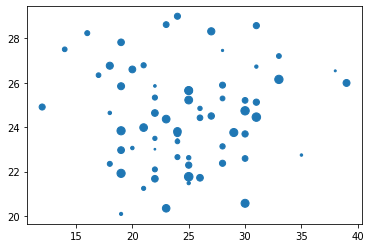

In [20]:
plt.scatter(urban_ride_count, 
            urban_avg_fare,
           s=urban_driver_count)

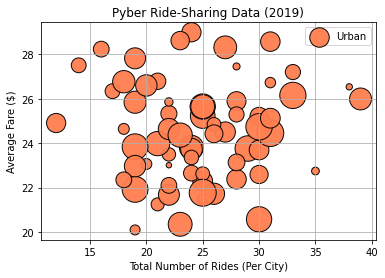

In [28]:
#scatter plot for urban
plt.scatter(urban_ride_count, 
            urban_avg_fare,
           s=10*urban_driver_count, c="coral",
           edgecolor="black", linewidth =1,
           alpha=.95, label = "Urban")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#Add the legend
plt.legend()

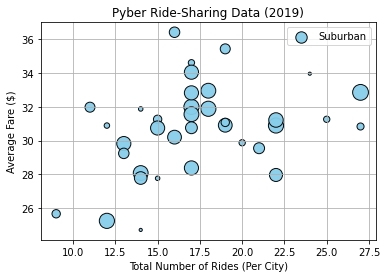

In [29]:
#scatter.suburban
plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
           s=10*suburban_driver_count, c="skyblue",
           edgecolor="black", linewidth =1,
           alpha=.95, label = "Suburban")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#Add the legend
plt.legend()

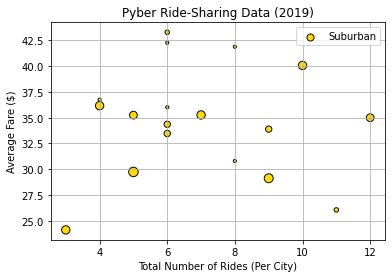

In [30]:
#scatter.rural
plt.scatter(rural_ride_count, 
            rural_avg_fare,
           s=10*rural_driver_count, c="gold",
           edgecolor="black", linewidth =1,
           alpha=.95, label = "Suburban")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
#Add the legend
plt.legend()

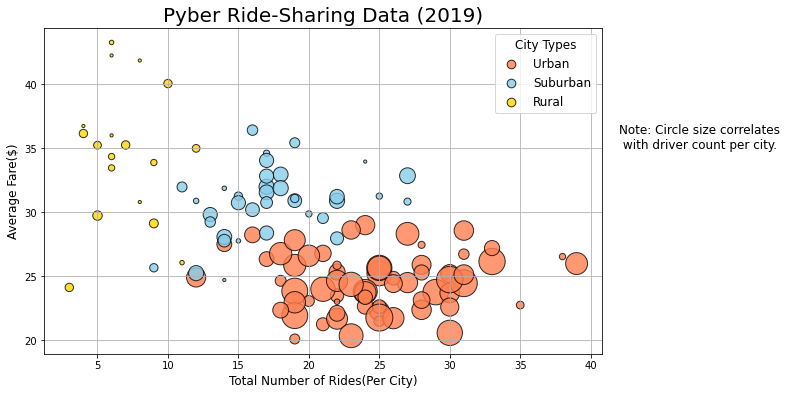

In [55]:
 #Add the scatter charts for each type of city.
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
#incorporate other graph properties
plt.title("Pyber Ride-Sharing Data (2019)", fontsize = 20)
plt.ylabel("Average Fare($)", fontsize= 12)
plt.xlabel("Total Number of Rides(Per City)", fontsize = 12)
plt.grid(True)
#create a legend
lgnd = plt.legend(fontsize = "12", mode="Expanded", 
                  scatterpoints=1, loc = "best", title= "City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#Add the following text to encorporate a text label about circle size
plt.text(42, 35, "Note: Circle size correlates \n with driver count per city.", fontsize="12")

#save the figure
plt.savefig("analysis/Fig1.png")
# Show the plot
plt.show()

In [56]:
#decribe urban cities
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [59]:
#Get summary statistics
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [61]:
#calculate the mean ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [64]:
suburban_ride_count.mode()

0    17
dtype: int64

In [69]:
#import sciPy
import scipy.stats as sts

# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")


The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([6]), count=array([5])).


In [85]:
#get teh fares for the urban cities
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]
urban_fares. head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [87]:
#calculate measurs of CT for average fare for urban cities
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.\n")

#calculate measurs of CT for average fare for suburban cities
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for urban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for urban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for urban trips is {mode_suburban_fares}.\n")

#calculate measurs of CT for average fare for rural cities
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for urban trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for urban trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for urban trips is {mode_rural_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).

The mean fare price for urban trips is $30.97.
The median fare price for urban trips is $30.75.
The mode fare price for urban trips is ModeResult(mode=array([17.99]), count=array([3])).

The mean fare price for urban trips is $34.62.
The median fare price for urban trips is $37.05.
The mode fare price for urban trips is ModeResult(mode=array([37.05]), count=array([2])).


In [88]:
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [89]:
#calculate measurs of CT for average fare for urban cities
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean fare price for urban trips is ${mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median fare price for urban trips is ${median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode fare price for urban trips is {mode_urban_drivers}.\n" )

#calculate measurs of CT for average fare for suburban cities
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean fare price for urban trips is ${mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median fare price for urban trips is ${median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode fare price for urban trips is {mode_suburban_drivers}.\n")

#calculate measurs of CT for average fare for rural cities
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean fare price for urban trips is ${mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median fare price for urban trips is ${median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode fare price for urban trips is {mode_rural_drivers}.")

The mean fare price for urban trips is $36.68.
The median fare price for urban trips is $37.00.
The mode fare price for urban trips is ModeResult(mode=array([39]), count=array([86])).

The mean fare price for urban trips is $13.71.
The median fare price for urban trips is $16.00.
The mode fare price for urban trips is ModeResult(mode=array([20]), count=array([79])).

The mean fare price for urban trips is $4.30.
The median fare price for urban trips is $4.00.
The mode fare price for urban trips is ModeResult(mode=array([1]), count=array([32])).


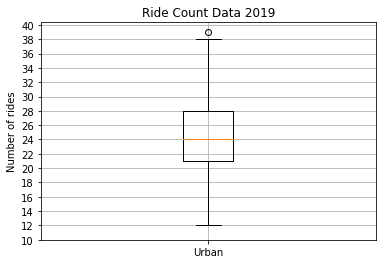

In [92]:
#create a box-and-whisker plot for urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
#add tittle, y axis label and grid
ax.set_title('Ride Count Data 2019')
ax.set_ylabel('Number of rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

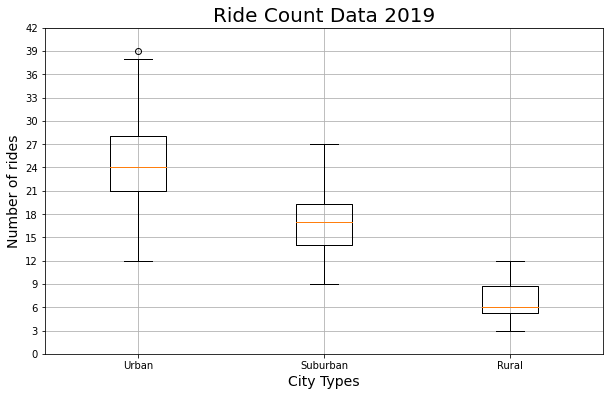

In [95]:
#add all ride count box - and whisker plots to teh same graph
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_title('Ride Count Data 2019',fontsize=20)
ax.set_ylabel('Number of rides', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
#save that ish
plt.savefig("analysis/Fig2.png")
plt.show()

In [98]:
#get the city that has the outlier (39)
urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


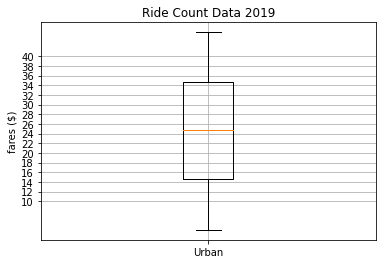

count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [101]:
#create a box-and-whisker plot for urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
#add tittle, y axis label and grid
ax.set_title('Ride Count Data 2019')
ax.set_ylabel('fares ($)')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()
urban_fares.describe()

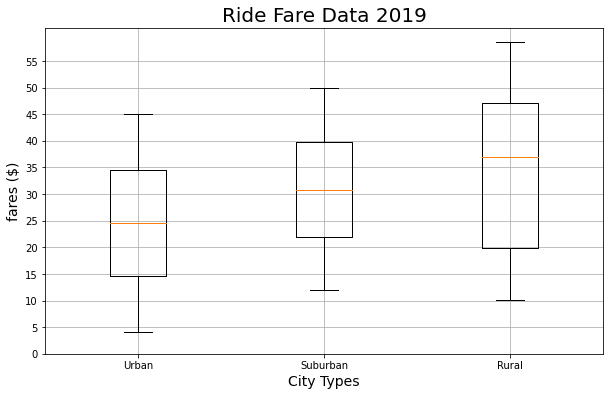

In [106]:
#add all ride fare box - and whisker plots to teh same graph
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_title('Ride Fare Data 2019',fontsize=20)
ax.set_ylabel('fares ($)', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
#save that ish
plt.savefig("analysis/Fig3.png")
plt.show()

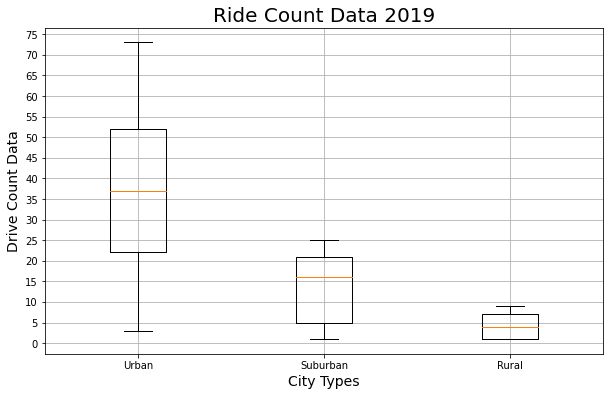

In [107]:
#add all ride fare box - and whisker plots to teh same graph
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_title('Ride Count Data 2019',fontsize=20)
ax.set_ylabel('Drive Count Data', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()
#save that ish
plt.savefig("analysis/Fig4.png")
plt.show()

In [109]:
# Get the sum of the fares for each city type.
sum_fares_by_type = pyber_data_df.groupby("type").sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [110]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [111]:
# Calculate the percentage of fare for each city type.
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

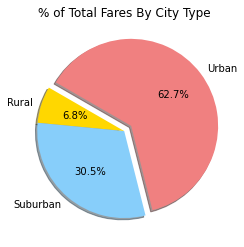

In [115]:
#build the percentage of fairs by city type pie chart
plt.pie(type_percents,
        labels = ["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow = True, 
        startangle =150
       )
plt.title("% of Total Fares By City Type")
plt.show()

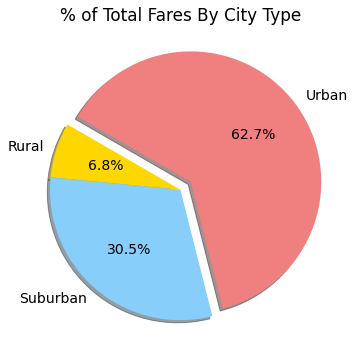

In [127]:
#Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
#Build The pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
        labels = ["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow = True, 
        startangle =150
       )
plt.title("% of Total Fares By City Type")
#change default font size
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
plt.show()

In [132]:
#total rides by city type
sum_rides_by_type = pyber_data_df.groupby("type").count()["ride_id"]
ride_percents = 100* sum_rides_by_type/pyber_data_df["ride_id"].count()
ride_percet

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

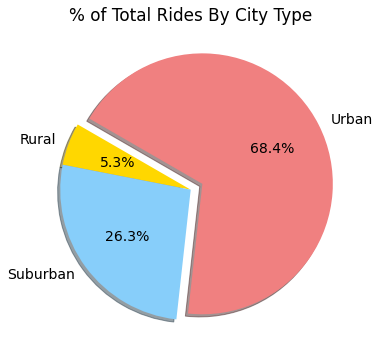

In [133]:
#Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
#Build The pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
        labels = ["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow = True, 
        startangle =150
       )
plt.title("% of Total Rides By City Type")
#change default font size
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
plt.show()

In [134]:
driver_percents = 100* 
city_data_df.groupby("type").sum()["driver_count"]/
pcity_data_df["driver_count"].sum()
driver_percents

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64